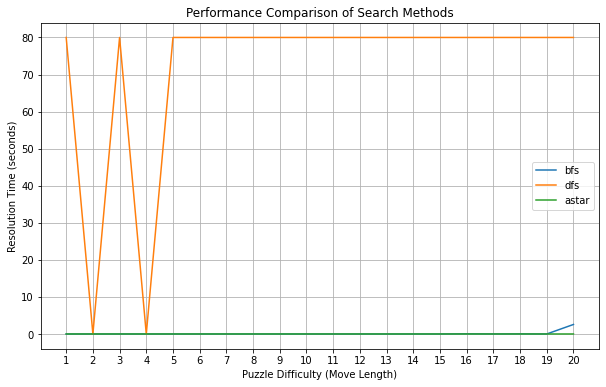

In [ ]:
import os
import matplotlib.pyplot as plt
import time
import signal
from npuzzle import load_puzzle
from solve_npuzzle import solve_bfs, solve_dfs, solve_astar
from node import Node


class TimeoutException(Exception):
    pass


def timeout_handler(signum, frame):
    raise TimeoutException("Execution timed out")


test_files_dir = 'test4x4'


results = []

TIMEOUT_DURATION = 80  


for filename in os.listdir(test_files_dir):
    if filename.endswith('.txt'):  
        filepath = os.path.join(test_files_dir, filename)
        
       
        puzzle = load_puzzle(filepath)
        
        
        algorithms = {'bfs': solve_bfs, 'dfs': solve_dfs, 'astar': solve_astar}
        for algo_name, algo_func in algorithms.items():
            root = Node(state=puzzle, move=None)
            open_list = [root]
            close_list = [] if algo_name == 'astar' else None
            
            try:
            
                signal.signal(signal.SIGALRM, timeout_handler)
                signal.alarm(TIMEOUT_DURATION) 
                
                start_time = time.time()
                solution = algo_func(open_list, close_list) if close_list is not None else algo_func(open_list)
                duration = time.time() - start_time
                
              
                signal.alarm(0)
                
             
                move_length = int(filename.split('_len')[1].split('_')[0])
                results.append((move_length, algo_name, duration))
            
            except TimeoutException:
                results.append((move_length, algo_name,TIMEOUT_DURATION))  


results.sort(key=lambda x: x[0])


difficulties = sorted(set(r[0] for r in results))
algorithms = set(r[1] for r in results)


plt.figure(figsize=(10, 6))
for algo_name in algorithms:
    algo_results = [r for r in results if r[1] == algo_name]
    algo_difficulties = [r[0] for r in algo_results]
    algo_durations = [r[2] for r in algo_results]
    
    
    plt.plot(algo_difficulties, algo_durations, label=algo_name)

plt.xlabel('Puzzle Difficulty (Move Length)')
plt.ylabel('Resolution Time (seconds)')
plt.title('Performance Comparison of Search Methods')
plt.legend()
plt.grid()
plt.xticks(range(1, 21))
plt.show()

/home/jaxousama/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


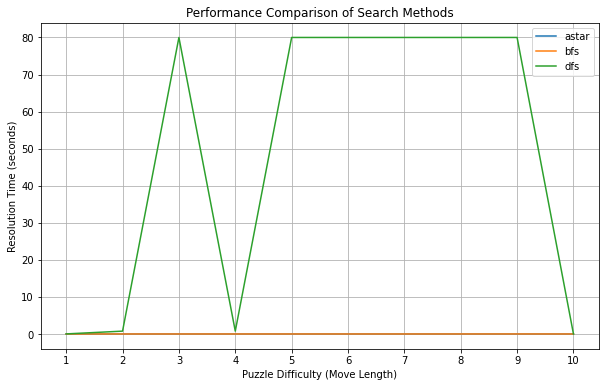

In [2]:
import os
import matplotlib.pyplot as plt
import time
import signal 
from npuzzle import load_puzzle
from solve_npuzzle import solve_bfs, solve_dfs, solve_astar
from node import Node


class TimeoutException(Exception):
    pass


def timeout_handler(signum, frame):
    raise TimeoutException("Execution timed out")


test_files_dir = 'test3x3'


results = []


TIMEOUT_DURATION = 80

for filename in os.listdir(test_files_dir):
    if filename.endswith('.txt'):  
        filepath = os.path.join(test_files_dir, filename)
        
       
        puzzle = load_puzzle(filepath)
        
        
        algorithms = {'bfs': solve_bfs, 'dfs': solve_dfs, 'astar': solve_astar}
        for algo_name, algo_func in algorithms.items():
            root = Node(state=puzzle, move=None)
            open_list = [root]
            close_list = [] if algo_name == 'astar' else None
            
            try:
              
                signal.signal(signal.SIGALRM, timeout_handler)
                signal.alarm(TIMEOUT_DURATION)  
                
                start_time = time.time()
                solution = algo_func(open_list, close_list) if close_list is not None else algo_func(open_list)
                duration = time.time() - start_time
                
                
                signal.alarm(0)
                
             
                move_length = int(filename.split('_len')[1].split('_')[0])
                results.append((move_length, algo_name, duration))
            
            except TimeoutException:
                results.append((move_length, algo_name,TIMEOUT_DURATION))  


results.sort(key=lambda x: x[0])


difficulties = sorted(set(r[0] for r in results))
algorithms = set(r[1] for r in results)


plt.figure(figsize=(10, 6))
for algo_name in algorithms:
    algo_results = [r for r in results if r[1] == algo_name]
    algo_difficulties = [r[0] for r in algo_results]
    algo_durations = [r[2] for r in algo_results]
    
  
    plt.plot(algo_difficulties, algo_durations, label=algo_name)

plt.xlabel('Puzzle Difficulty (Move Length)')
plt.ylabel('Resolution Time (seconds)')
plt.title('Performance Comparison of Search Methods')
plt.legend()
plt.grid()
plt.xticks(range(1, 11))
plt.show()

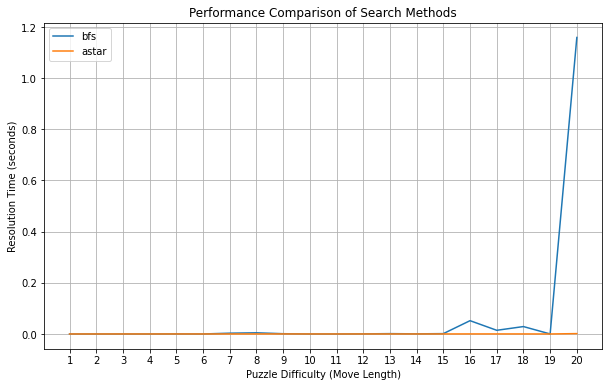

In [ ]:
import os
import matplotlib.pyplot as plt
import time
import signal 
from npuzzle import load_puzzle
from solve_npuzzle import solve_bfs, solve_dfs, solve_astar
from node import Node


class TimeoutException(Exception):
    pass


def timeout_handler(signum, frame):
    raise TimeoutException("Execution timed out")


test_files_dir = 'test10x10'


results = []


TIMEOUT_DURATION = 80

for filename in os.listdir(test_files_dir):
    if filename.endswith('.txt'):  
        filepath = os.path.join(test_files_dir, filename)
        
       
        puzzle = load_puzzle(filepath)
        
        
        algorithms = {'bfs': solve_bfs, 'astar': solve_astar}
        for algo_name, algo_func in algorithms.items():
            root = Node(state=puzzle, move=None)
            open_list = [root]
            close_list = [] if algo_name == 'astar' else None
            
            try:
              
                signal.signal(signal.SIGALRM, timeout_handler)
                signal.alarm(TIMEOUT_DURATION)  
                
                start_time = time.time()
                solution = algo_func(open_list, close_list) if close_list is not None else algo_func(open_list)
                duration = time.time() - start_time
                
                
                signal.alarm(0)
                
             
                move_length = int(filename.split('_len')[1].split('_')[0])
                results.append((move_length, algo_name, duration))
            
            except TimeoutException:
                results.append((move_length, algo_name,TIMEOUT_DURATION))  


results.sort(key=lambda x: x[0])


difficulties = sorted(set(r[0] for r in results))
algorithms = set(r[1] for r in results)


plt.figure(figsize=(10, 6))
for algo_name in algorithms:
    algo_results = [r for r in results if r[1] == algo_name]
    algo_difficulties = [r[0] for r in algo_results]
    algo_durations = [r[2] for r in algo_results]
    
  
    plt.plot(algo_difficulties, algo_durations, label=algo_name)

plt.xlabel('Puzzle Difficulty (Move Length)')
plt.ylabel('Resolution Time (seconds)')
plt.title('Performance Comparison of Search Methods')
plt.legend()
plt.grid()
plt.xticks(range(1, 21))
plt.show()